In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

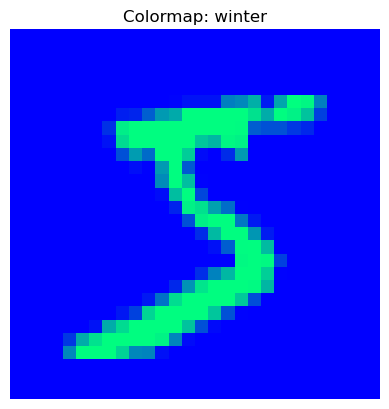

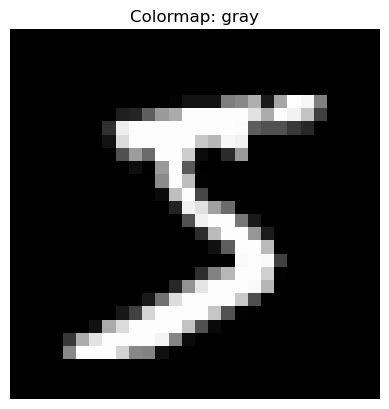

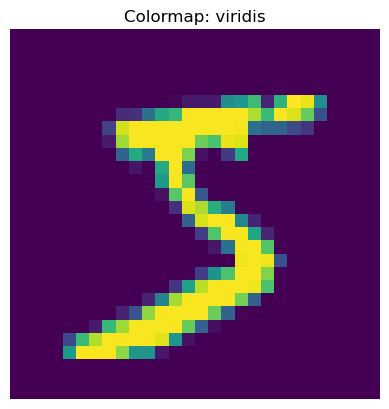

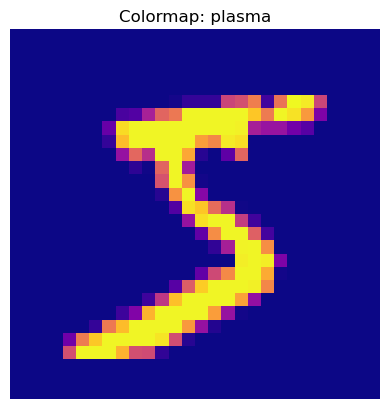

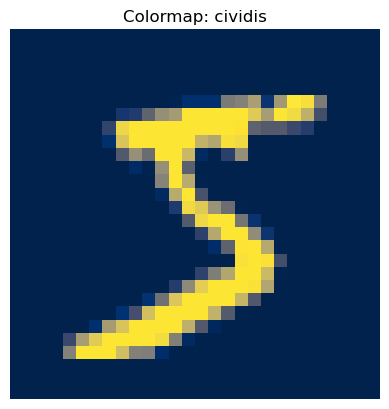

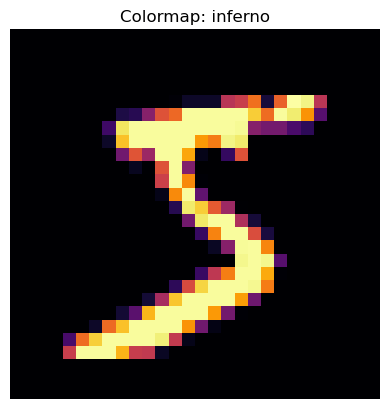

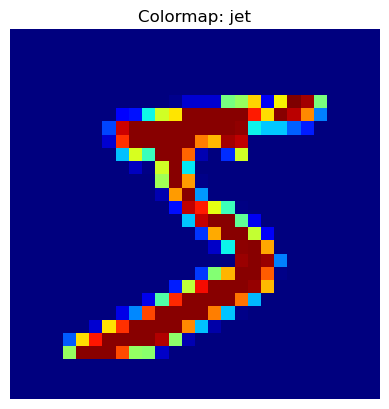

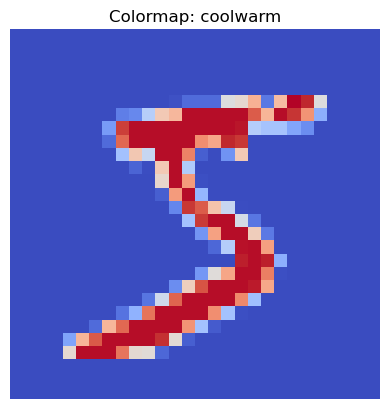

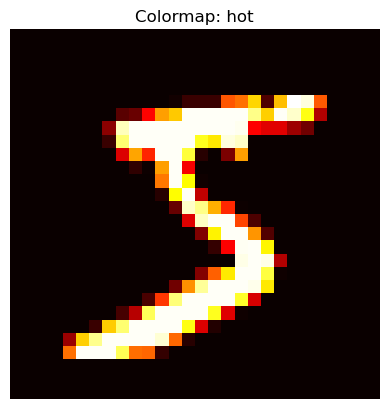

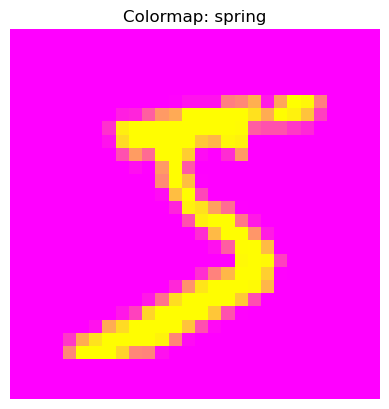

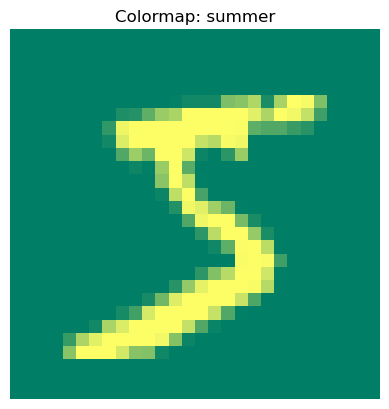

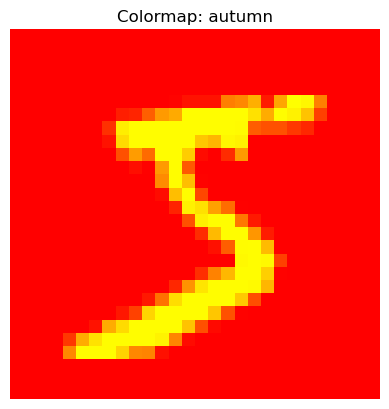

In [3]:
(X_train,y_train),(X_test,y_test)= mnist.load_data() ## Loaded as numpy array X_train of size(6000,28,28)->pixes
image=X_train[0]
## image.show() -> won't work cozz this image os an numpy array -> doesn't have .show()
cmaps = ['winter', 'gray', 'viridis', 'plasma', 'cividis', 'inferno', 
         'jet', 'coolwarm', 'hot', 'spring', 'summer', 'autumn']

# Plot each cmap
for cmap in cmaps:
    plt.imshow(image, cmap=cmap)
    plt.title(f'Colormap: {cmap}')
    plt.axis('off')
    plt.xlabel(f'Label: {y_train[0]}')
    plt.show()

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images (28x28 → 784)
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [5]:

# NOTE:
# After reshaping or flattening (shape: 784,), you CANNOT directly use imshow()
# because imshow() expects 2D array (28x28 for MNIST).

# So:
# Only works correctly when image is in shape (28, 28).
# If flattened → reshape back using: image.reshape(28,28)

# '''
| Name         | Description                                                | Example Use Case                                    |
| ------------ | ---------------------------------------------------------- | --------------------------------------------------- |
| `'gray'`     | Grayscale                                                  | MNIST, medical images                               |
| `'viridis'`  | Default matplotlib colormap (smooth, perceptually uniform) | Heatmaps, density plots                             |
| `'plasma'`   | Bright purples/yellows                                     | Attention maps                                      |
| `'inferno'`  | Darker heatmap                                             | Very cool for gradients                             |
| `'magma'`    | Similar to inferno, more brownish                          | Heatmaps                                            |
| `'cividis'`  | Good for colorblind-safe plots                             | Accessibility                                       |
| `'jet'`      | Old-school rainbow                                         | (Don’t use for serious work — misleading sometimes) |
| `'coolwarm'` | Blue-red transition                                        | Correlation heatmaps                                |
| `'hot'`      | Yellow-orange-red                                          | Thermal images                                      |
| `'spring'`   | Pinkish                                                    | Just for fun sometimes                              |
| `'summer'`   | Greenish                                                   | Same, playful                                       |
| `'autumn'`   | Red-orange                                                 | Seasonal vibes                                      |
| `'winter'`   | Blue-cyan                                                  | Seasonal                                            |
'''""

In [7]:
print(len(X_train), len(X_test))

60000 10000


In [8]:
X=np.concatenate([X_train, X_test], axis=0)
X.shape

(70000, 784)

In [9]:
y=np.concatenate([y_train,y_test], axis=0)
y.shape

(70000,)

In [10]:
X_train, X_test,y_train, y_test= train_test_split(X,y ,random_state=42)
len(X_train),len(y_train)

(52500, 52500)

In [11]:
X_train,y_train,X_test,y_test= X_train[:1000],y_train[:1000],X_test[:100],y_test[:100]
len(X_train),len(y_train),len(X_test),len(y_test)

(1000, 1000, 100, 100)

| Expression | Meaning                                      | Example if array = 1000 elements |
| ---------- | -------------------------------------------- | -------------------------------- |
| `[:100]`   | Take first 100 elements (index 0 to 99)      | `[0, 1, 2, ..., 99]`             |
| `[100:]`   | Take elements starting from index 100 to end | `[100, 101, ..., 999]`           |


Convergence means — training done.

Vanishing gradient means(mostly due to extreme I/ps -> activations become lesser) — training stuck.

Your goal → smooth(Continuous), stable convergence(loss minimal)

# Randomly initialize weights W and biases b.
# Forward Pass
Perceptron logic: 𝑧=𝑊.𝑋+𝑏 -> Linear Function

# Apply activation function:
𝑎=𝐴𝑐𝑡𝑖𝑣𝑎𝑡𝑖𝑜𝑛(𝑧)   -> applying non linear fun

# Loss Calculation

# Backward Pass (Backpropagation)
You calculate:
∂Loss/∂W = ∂Loss/∂a * ∂a/∂z * ∂z/∂WEvery activation function has its own derivative:  if derivatives become tiny — vanishing gradient.

# Weight Update (Gradient Descent)
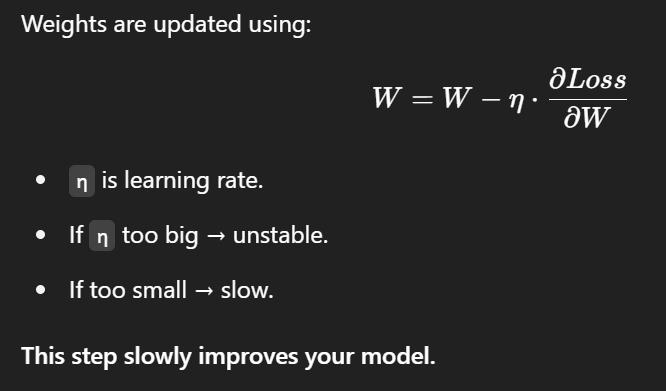

# Repeat for Multiple Epochs
# When weights stabilize and loss stops improving → convergence.

# Evaluation
# (Optional) Regularization


# Data → Forward Pass → Loss → Backpropagation → Weight Update → Repeat → Convergence → Evaluation



| Step               | Activation Role                               |
| ------------------ | --------------------------------------------- |
| Forward Pass       | Converts linear z into non-linear patterns    |
| Backpropagation    | Their derivative directly affects gradient    |
| Vanishing Gradient | Certain activations cause shrinking gradients |
| Convergence        | Activations affect how quickly we converge    |



 
 | Activation     | Formula                           | Derivative               | GD Behavior                                  | Vanishing Gradient?                             | When to Use                                |
| -------------- | --------------------------------- | ------------------------ | -------------------------------------------- | ----------------------------------------------- | ------------------------------------------ |
| **Sigmoid**    | 𝜎(x) = 1 / (1 + e⁻ˣ)             | 𝜎(x)(1-𝜎(x))           | Slow updates when far from 0                 | ❌ Major Problem (derivative → 0 as x → ±∞)      | Binary classification output, last layer   |
| **Tanh**       | tanh(x) = (eˣ - e⁻ˣ) / (eˣ + e⁻ˣ) | 1 - tanh²(x)             | Slightly better than Sigmoid (zero-centered) | ❌ Still suffers, but less than Sigmoid          | When you need output between -1 and 1      |
| **ReLU**       | max(0, x)                         | 1 if x>0; 0 if x≤0       | Fast learning for positive values            | ✅ No vanishing for positives                    | Hidden layers in most modern DL models     |
| **Leaky ReLU** | max(αx, x) (α small)              | 1 if x>0; α if x≤0       | Avoids dead neurons                          | ✅ Rare vanishing (small α keeps gradient alive) | Same as ReLU but more stable               |
| **ELU**        | x if x>0, α(eˣ - 1) if x≤0        | Smooth derivative        | More stable learning                         | ✅ Almost none                                   | Deep networks with better convergence      |
| **Swish**      | x \* sigmoid(x)                   | Complex                  | Smooth learning                              | ✅ Less vanishing than sigmoid/tanh              | Deep CNNs, Transformers                    |
| **GELU**       | x \* P(X ≤ x) (Gaussian)          | Complex                  | Smooth and probabilistic                     | ✅ Almost no vanishing                           | SOTA NLP models, Transformers              |
| **Softmax**    | eˣᵢ / Σeˣⱼ                        | Softmax \* (1 - softmax) | Converts logits to probs                     | ❌ Not for hidden layers                         | Final layer for multi-class classif

st   |
cation |


| Case                   | Use                      |
| ---------------------- | ------------------------ |
| Very deep network      | ReLU / Leaky ReLU / GELU |
| Small binary output    | Sigmoid                  |
| Centered output needed | Tanh                     |
| Very deep NLP models   | GELU / Swish             |
| Multi-class output     | Softmax                  |
| If unsure              | ReLU is usually safest   |


# Loss

| Problem Type                    | Loss Function                    |
| ------------------------------- | -------------------------------- |
| Regression (Normal)             | MSE                              |
| Regression (Outliers present)   | MAE or Huber                     |
| Binary Classification           | Binary Cross Entropy (Log Loss)  |
| Multi-class Classification      | Categorical Cross Entropy        |
| Multi-class w/ integer labels   | Sparse Categorical Cross Entropy |
| Probabilistic Distributions     | KL Divergence                    |
| SVM or Margin-based Classifiers | Hinge Loss                       |
| Sequence Problems               | CTC Loss                  


| Activation             | Typical Loss              |
| ---------------------- | ------------------------- |
| Sigmoid                | Binary Cross Entropy      |
| Softmax                | Categorical Cross Entropy |
| Linear (no activation) | MSE, MAE                  |
| None                   | Hinge Loss (SVM)      


| Loss Function                        | Formula                                                                | Use Case                              | Output Type                    | Why / When                                                                   |            |                                                     |
| ------------------------------------ | ---------------------------------------------------------------------- | ------------------------------------- | ------------------------------ | ---------------------------------------------------------------------------- | ---------- | --------------------------------------------------- |
| **MSE (Mean Squared Error)**         | $\frac{1}{n} \sum (y - \hat{y})^2$                                     | Regression                            | Continuous                     | Punishes large errors more. Smooth gradients.                                |            |                                                     |
| **MAE (Mean Absolute Error)**        | (\frac{1}{n} \sum                                                      | y - \hat{y}                           | )                              | Regression                                                                   | Continuous | More robust to outliers, but gradients less smooth. |
| **Huber Loss**                       | Combination of MSE & MAE                                               | Regression                            | Continuous                     | Smooth near small errors, robust to outliers.                                |            |                                                     |
| **Log Loss (Binary Cross Entropy)**  | $-\frac{1}{n} \sum \left[y \log \hat{y} + (1-y)\log(1-\hat{y})\right]$ | Binary Classification                 | Probabilities (0-1)            | For Sigmoid output. Strong penalization for wrong confident predictions.     |            |                                                     |
| **Categorical Cross Entropy**        | $-\sum y_i \log \hat{y_i}$                                             | Multi-class Classification            | Probabilities (Softmax output) | Used when only 1 class is correct out of many.                               |            |                                                     |
| **Sparse Categorical Cross Entropy** | Same as above but works with integer labels                            | Multi-class Classification            | Probabilities (Softmax)        | Useful for multi-class labels without one-hot encoding.                      |            |                                                     |
| **KL Divergence (Relative Entropy)** | $\sum y \log \frac{y}{\hat{y}}$                                        | Probabilistic Models                  | Probabilities                  | Measures difference between two distributions. Used in VAEs, Language Models |            |                                                     |
| **Hinge Loss**                       | $\sum \max(0, 1 - y \cdot \hat{y})$                                    | SVM (binary classification)           | Labels must be -1, 1           | Maximizes margin between classes                                             |            |                                                     |
| **Squared Hinge Loss**               | $\sum (\max(0, 1 - y \cdot \hat{y}))^2$                                | SVM (soft margin)                     | Labels must be -1, 1           | Smooth variant of Hinge Loss                                                 |            |                                                     |
| **Poisson Loss**                     | $\sum \hat{y} - y \log \hat{y}$                                        | Count data (Poisson dist.)            | Positive integers              | For modeling count data (Ex: # of events per time)                           |            |                                                     |
| **CTC Loss**                         | Complex                                                                | Speech Recognition, Sequence Problems | Sequences                      | Aligns variable-length sequences (used in speech/text models)                |            |                                                     |





# Gradient descent types:

| Name                                  | Formula                   | Intuition                        | Use Case        | Problem             |
| ------------------------------------- | ------------------------- | -------------------------------- | --------------- | ------------------- |
| **Batch Gradient Descent**            | W = W - η \* ∇L(W)        | Uses full dataset for every step | Small datasets  | Slow for large data |
| **Stochastic Gradient Descent (SGD)** | W = W - η \* ∇L(W\_i)     | Uses 1 sample at a time          | Online Learning | Noisy updates       |
| **Mini-batch Gradient Descent**       | W = W - η \* ∇L(W\_batch) | Uses batch of samples            | Standard DL     | Balanced approach 




# Optimizers
| Optimizer                               | Formula / Update                                                 | Intuition                                  | Pros                           | Cons                          |
| --------------------------------------- | ---------------------------------------------------------------- | ------------------------------------------ | ------------------------------ | ----------------------------- |
| **SGD (Vanilla)**                       | W = W - η \* ∇L                                                  | Simple, baseline                           | Easy to understand             | Oscillates, slow              |
| **Momentum**                            | v = βv + ∇L; W = W - ηv                                          | Adds momentum like physics                 | Faster convergence             | Can overshoot                 |
| **Nesterov Accelerated Gradient (NAG)** | Look ahead → then update                                         | Smarter momentum                           | Faster than momentum           | Complex tuning                |
| **Adagrad**                             | W = W - η / sqrt(G + ε) \* ∇L                                    | Adaptive learning rate                     | Great for sparse data (NLP)    | Learning rate decays too much |
| **RMSprop**                             | G = decay \* G + (1-decay) \* ∇L²; W = W - η / sqrt(G + ε) \* ∇L | Keeps learning rate stable                 | Popular for RNNs               | Sensitive to hyperparams      |
| **Adadelta**                            | Similar to RMSprop                                               | No manual learning rate                    | No LR to tune                  | May still oscillate           |
| **Adam (King 👑)**                      | Combines Momentum + RMSprop                                      | Best of both worlds                        | Fast, stable, works everywhere | Complex behind scenes         |
| **AdaMax**                              | Variant of Adam                                                  | Works better for some problems             | Very stable                    | Less used now                 |
| **Nadam**                               | Nesterov + Adam                                                  | Adds lookahead to Adam                     | Smooth convergence             | Complex                       |
| **AMSGrad**                             | Fixes some Adam issues                                           | Guaranteed convergence                     | Safer than Adam                | Less used now                 |
| **Lion (Latest)**                       | New optimizer used in LLMs                                       | Works extremely well for very large models | SOTA                           | Still new          


| Case            | Optimizer       |
| --------------- | --------------- |
| Beginner        | Adam            |
| Small model     | SGD or Momentum |
| RNN / LSTM      | RMSprop         |
| Large DL models | Adam / Lion     |
| Sparse data     | Adagrad         |
| Cutting edge    | Lion, Nadam     |          |
  |
     |
      |


# Pytorch

In [46]:
import os

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [50]:
X_train_tensor,X_test_tensor=torch.from_numpy(X_train).float(),torch.from_numpy(X_test).float()
y_train_tensor,y_test_tensor=torch.from_numpy(y_train).long(),torch.from_numpy(y_test).long()

# Model

In [53]:
class DigiClassification(nn.Module):
    def __init__(self):
        super(DigiClassification, self).__init__()
        self.network=nn.Sequential(  
                                             #  nn.Flatten(),                     # Converts 28x28 -> 784
            nn.Linear(784, 128),              # Hidden Layer 1
            nn.ReLU(),
            nn.Linear(128, 64),               # Hidden Layer 2
            nn.ReLU(),
            nn.Linear(64, 10)                 # Output Layer (10 classes)    # No softmax here — CrossEntropyLoss includes it internally
        )
    def forward(self,x):
        return self.network(x)

model = DigiClassification().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

| Framework | Last layer      | Loss function           | Why                                 |
| --------- | --------------- | ----------------------- | ----------------------------------- |
| Keras     | Dense + Softmax | CategoricalCrossentropy | Automatically expects probabilities |
| PyTorch   | Dense (linear)  | CrossEntropyLoss        | Applies softmax inside            

| Optimizer    | Syntax Example                                         | Notes                                     |
| ------------ | ------------------------------------------------------ | ----------------------------------------- |
| **SGD**      | `optim.SGD(model.parameters(), lr=0.01, momentum=0.9)` | Use `momentum=0.9` for faster convergence |
| **Adam**     | `optim.Adam(model.parameters(), lr=0.001)`             | Adaptive, widely used                     |
| **AdamW**    | `optim.AdamW(model.parameters(), lr=0.001)`            | Like Adam but better regularization       |
| **RMSprop**  | `optim.RMSprop(model.parameters(), lr=0.01)`           | Works well for RNNs                       |
| **Adagrad**  | `optim.Adagrad(model.parameters(), lr=0.01)`           | Good for sparse data                      |
| **Adadelta** | `optim.Adadelta(model.parameters())`                   | No need to set learning rate              |
| **ASGD**     | `optim.ASGD(model.parameters(), lr=0.01)`              | Averaged SGD                       


  
| Loss Function         | Syntax Example                            | For...                                  |
| --------------------- | ----------------------------------------- | --------------------------------------- |
| **CrossEntropyLoss**  | `loss_fn = nn.CrossEntropyLoss()`         | Multi-class classification (raw logits) |
| **NLLLoss**           | `loss_fn = nn.NLLLoss()`                  | Multi-class with log-probabilities      |
| **MSELoss**           | `loss_fn = nn.MSELoss()`                  | Regression                              |
| **L1Loss**            | `loss_fn = nn.L1Loss()`                   | Robust regression                       |
| **BCEWithLogitsLoss** | `loss_fn = nn.BCEWithLogitsLoss()`        | Binary classification (raw logits)      |
| **BCELoss**           | `loss_fn = nn.BCELoss()`                  | Binary classification (probabilities)   |
| **SmoothL1Loss**      | `loss_fn = nn.SmoothL1Loss()`             | Mix between L1 and MSE                  |
| **HuberLoss**         | `loss_fn = nn.HuberLoss()` (PyTorch 1.9+) | Regression with outliers        

| Activation     | `nn` version         | `F` version             | Use Case                            |
| -------------- | -------------------- | ----------------------- | ----------------------------------- |
| **ReLU**       | `nn.ReLU()`          | `F.relu(x)`             | Default for most layers             |
| **Sigmoid**    | `nn.Sigmoid()`       | `F.sigmoid(x)`          | Binary outputs                      |
| **Tanh**       | `nn.Tanh()`          | `F.tanh(x)`             | RNNs                                |
| **LeakyReLU**  | `nn.LeakyReLU()`     | `F.leaky_relu(x)`       | Like ReLU, but avoids dying neurons |
| **Softmax**    | `nn.Softmax(dim=1)`  | `F.softmax(x, dim=1)`   | Output probabilities                |
| **LogSoftmax** | `nn.LogSoftmax(dim)` | `F.log_softmax(x, dim)` | Used with `NLLLoss()`               |
| **ELU**        | `nn.ELU()`           | `F.elu(x)`              | Experimental cases                  |
| **GELU**       | `nn.GELU()`          | `F.gelu(x)`             | Used in Transformers                |
        |
     |
  |


In [56]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

| Phase     | Use `DataLoader`? | Why                                                    |
| --------- | ----------------- | ------------------------------------------------------ |
| Training  | ✅ Yes             | Needed for batching, shuffling, and efficiency         |
| Testing   | ✅ Yes             | Needed for batching, shape consistency, fast inference |
| Debugging | ❌ Optional        | If you're only debugging single images                 |


In [58]:
epochs=50
for epoch in tqdm(range(epochs)):
    model.train()
    tot_loss=0
    for images, labels in train_loader:
        images,lables=images.to(device), labels.to(device)

        output=model(images)
        loss=criterion(output,labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tot_loss+=loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {tot_loss/len(train_dataset):.4f}")       

  2%|█▋                                                                                 | 1/50 [00:00<00:26,  1.85it/s]

Epoch [1/50], Loss: 0.0392


  4%|███▎                                                                               | 2/50 [00:00<00:20,  2.30it/s]

Epoch [2/50], Loss: 0.0164


  6%|████▉                                                                              | 3/50 [00:01<00:15,  3.02it/s]

Epoch [3/50], Loss: 0.0091
Epoch [4/50], Loss: 0.0061


 10%|████████▎                                                                          | 5/50 [00:01<00:11,  3.92it/s]

Epoch [5/50], Loss: 0.0035


 12%|█████████▉                                                                         | 6/50 [00:01<00:10,  4.09it/s]

Epoch [6/50], Loss: 0.0030


 14%|███████████▌                                                                       | 7/50 [00:02<00:11,  3.65it/s]

Epoch [7/50], Loss: 0.0014


 16%|█████████████▎                                                                     | 8/50 [00:02<00:12,  3.25it/s]

Epoch [8/50], Loss: 0.0010


 18%|██████████████▉                                                                    | 9/50 [00:02<00:12,  3.34it/s]

Epoch [9/50], Loss: 0.0018


 20%|████████████████▍                                                                 | 10/50 [00:03<00:12,  3.33it/s]

Epoch [10/50], Loss: 0.0009


 22%|██████████████████                                                                | 11/50 [00:03<00:11,  3.33it/s]

Epoch [11/50], Loss: 0.0034


 24%|███████████████████▋                                                              | 12/50 [00:03<00:11,  3.38it/s]

Epoch [12/50], Loss: 0.0016


 26%|█████████████████████▎                                                            | 13/50 [00:03<00:10,  3.37it/s]

Epoch [13/50], Loss: 0.0023


 28%|██████████████████████▉                                                           | 14/50 [00:04<00:10,  3.36it/s]

Epoch [14/50], Loss: 0.0055


 30%|████████████████████████▌                                                         | 15/50 [00:04<00:10,  3.41it/s]

Epoch [15/50], Loss: 0.0038


 32%|██████████████████████████▏                                                       | 16/50 [00:04<00:10,  3.39it/s]

Epoch [16/50], Loss: 0.0037


 34%|███████████████████████████▉                                                      | 17/50 [00:05<00:09,  3.43it/s]

Epoch [17/50], Loss: 0.0026


 36%|█████████████████████████████▌                                                    | 18/50 [00:05<00:09,  3.41it/s]

Epoch [18/50], Loss: 0.0008


 38%|███████████████████████████████▏                                                  | 19/50 [00:05<00:08,  3.54it/s]

Epoch [19/50], Loss: 0.0002


 40%|████████████████████████████████▊                                                 | 20/50 [00:05<00:08,  3.61it/s]

Epoch [20/50], Loss: 0.0001


 42%|██████████████████████████████████▍                                               | 21/50 [00:06<00:07,  3.70it/s]

Epoch [21/50], Loss: 0.0000


 44%|████████████████████████████████████                                              | 22/50 [00:06<00:07,  3.74it/s]

Epoch [22/50], Loss: 0.0000


 46%|█████████████████████████████████████▋                                            | 23/50 [00:06<00:07,  3.66it/s]

Epoch [23/50], Loss: 0.0000


 48%|███████████████████████████████████████▎                                          | 24/50 [00:07<00:07,  3.57it/s]

Epoch [24/50], Loss: 0.0000


 50%|█████████████████████████████████████████                                         | 25/50 [00:07<00:06,  3.62it/s]

Epoch [25/50], Loss: 0.0000


 52%|██████████████████████████████████████████▋                                       | 26/50 [00:07<00:06,  3.73it/s]

Epoch [26/50], Loss: 0.0000


 54%|████████████████████████████████████████████▎                                     | 27/50 [00:07<00:05,  3.87it/s]

Epoch [27/50], Loss: 0.0000


 56%|█████████████████████████████████████████████▉                                    | 28/50 [00:08<00:05,  3.95it/s]

Epoch [28/50], Loss: 0.0000


 58%|███████████████████████████████████████████████▌                                  | 29/50 [00:08<00:05,  4.06it/s]

Epoch [29/50], Loss: 0.0000


 60%|█████████████████████████████████████████████████▏                                | 30/50 [00:08<00:04,  4.07it/s]

Epoch [30/50], Loss: 0.0000


 62%|██████████████████████████████████████████████████▊                               | 31/50 [00:08<00:05,  3.21it/s]

Epoch [31/50], Loss: 0.0000


 64%|████████████████████████████████████████████████████▍                             | 32/50 [00:09<00:05,  3.16it/s]

Epoch [32/50], Loss: 0.0000


 66%|██████████████████████████████████████████████████████                            | 33/50 [00:09<00:05,  3.23it/s]

Epoch [33/50], Loss: 0.0000


 68%|███████████████████████████████████████████████████████▊                          | 34/50 [00:09<00:04,  3.23it/s]

Epoch [34/50], Loss: 0.0000


 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [00:10<00:04,  3.20it/s]

Epoch [35/50], Loss: 0.0000


 72%|███████████████████████████████████████████████████████████                       | 36/50 [00:10<00:05,  2.78it/s]

Epoch [36/50], Loss: 0.0000


 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [00:11<00:05,  2.50it/s]

Epoch [37/50], Loss: 0.0000


 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [00:11<00:04,  2.73it/s]

Epoch [38/50], Loss: 0.0000


 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [00:11<00:03,  3.05it/s]

Epoch [39/50], Loss: 0.0000


 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [00:12<00:03,  2.74it/s]

Epoch [40/50], Loss: 0.0000


 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [00:12<00:03,  2.49it/s]

Epoch [41/50], Loss: 0.0000


 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [00:12<00:03,  2.66it/s]

Epoch [42/50], Loss: 0.0000


 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [00:13<00:02,  2.99it/s]

Epoch [43/50], Loss: 0.0000


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [00:13<00:02,  2.67it/s]

Epoch [44/50], Loss: 0.0000


 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [00:14<00:01,  2.68it/s]

Epoch [45/50], Loss: 0.0000


 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [00:14<00:01,  2.73it/s]

Epoch [46/50], Loss: 0.0000


 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [00:14<00:01,  2.78it/s]

Epoch [47/50], Loss: 0.0000


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [00:15<00:00,  2.90it/s]

Epoch [48/50], Loss: 0.0000


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [00:15<00:00,  2.99it/s]

Epoch [49/50], Loss: 0.0000


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:15<00:00,  3.20it/s]

Epoch [50/50], Loss: 0.0000


In [59]:
model.eval()
correct = 0
total = 0

with torch.inference_mode():
    for images, labels in test_loader:  # ✅ Use DataLoader here
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)          # outputs.shape = [batch_size, 10]
        _, predicted = torch.max(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 94.00%
